##**Final Project Plan – Winter 2025/2026**



**Objective**

Analyze and visualize global development trends using the World Bank World Development Indicators (WDI) dataset.
Focus on socio-economic, governance, environmental, and population metrics to uncover insights about global development patterns and country-level performance.

Key idea: Tell a story with the data – e.g., how governance, economic, and environmental factors correlate with human development.

Setup & Libraries

In [ ]:
# Basic data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For maps
import geopandas as gpd
import folium


Load Dataset

In [11]:
import pandas as pd
from google.colab import files

# Load CSV into DataFrame
df = pd.read_csv("/content/world_bank_development_indicators.csv")

# Quick look
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17272 entries, 0 to 17271
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    17272 non-null  object 
 1   date                                       17272 non-null  object 
 2   agricultural_land%                         14714 non-null  float64
 3   forest_land%                               8176 non-null   float64
 4   land_area                                  14930 non-null  float64
 5   avg_precipitation                          10086 non-null  float64
 6   trade_in_services%                         9195 non-null   float64
 7   control_of_corruption_estimate             4783 non-null   float64
 8   control_of_corruption_std                  4783 non-null   float64
 9   access_to_electricity%                     7348 non-null   float64
 10  renewvable_energy_cons

,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,renewvable_energy_consumption%,electric_power_consumption,...,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
count,14714.000000,8176.000000,1.493000e+04,10086.000000,9195.000000,4783.000000,4783.000000,7348.000000,8076.000000,7790.000000,...,455.000000,2108.000000,16037.000000,16019.000000,15866.000000,1.666500e+04,1.653900e+04,4850.000000,4850.000000,4209.000000
mean,36.945264,32.408397,5.078664e+06,1214.021416,20.998956,-0.024874,0.203572,80.758176,31.029558,2885.204630,...,27.058386,37.797249,28.203391,10.490354,64.254193,2.159737e+08,1.231026e+08,-0.021062,0.167144,8.035708
std,20.552401,23.355506,1.406167e+07,810.573031,23.260442,1.000047,0.087529,28.745226,29.858553,4103.108667,...,11.262910,8.835216,12.862546,5.358976,11.112156,7.102653e+08,4.087475e+08,0.998757,0.064188,12.026623
min,0.262821,0.000000,2.027000e+00,18.100000,0.621025,-1.936706,0.114062,0.533899,0.000000,5.548906,...,2.370000,20.700000,5.000000,0.795000,11.995000,2.646000e+03,0.000000e+00,-2.313395,0.102437,0.000000
25%,20.454545,12.430556,2.164000e+04,591.000000,8.678157,-0.791694,0.147978,68.435427,5.065460,375.934172,...,18.300000,31.200000,16.438000,6.976522,56.810602,9.940000e+05,4.295845e+05,-0.850328,0.126422,1.348194
50%,37.470745,30.765419,2.419300e+05,1110.000000,13.456865,-0.253887,0.172218,98.290939,20.989980,1331.112025,...,24.800000,35.700000,27.065000,9.200000,66.776719,6.787419e+06,3.148533e+06,0.020768,0.142207,3.428468
75%,50.737179,47.118947,1.444290e+06,1782.000000,24.705827,0.666176,0.227055,100.000000,53.904220,3893.175308,...,33.300000,43.200000,39.752000,12.441818,72.568000,4.641603e+07,2.035198e+07,0.884255,0.196929,9.402278
max,93.440750,98.574551,1.299507e+08,3240.000000,327.166162,2.459118,0.942502,100.000000,98.340000,54799.174708,...,74.200000,65.800000,58.121000,103.534000,85.497561,7.950947e+09,3.435260e+09,1.800992,0.578548,138.773986


Data Cleaning & Preparation

In [8]:
# Combine country + year as index
df['country_year'] = df['country'] + '_' + df['date'].astype(str)
df.set_index('country_year', inplace=True)

# Convert percentage columns to numeric (if needed)
percent_cols = [col for col in df.columns if '%' in col]
for col in percent_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing numeric values (example: forward fill by country)
df = df.groupby('country').apply(lambda x: x.fillna(method='ffill'))


/tmp/ipython-input-3026376907.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.groupby('country').apply(lambda x: x.fillna(method='ffill'))
/tmp/ipython-input-3026376907.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('country').apply(lambda x: x.fillna(method='ffill'))


Exploratory Analysis & Visualizations (15 Questions)

1) **Global Economic Growth:** How has the total global GDP evolved from 1960 to 2022?

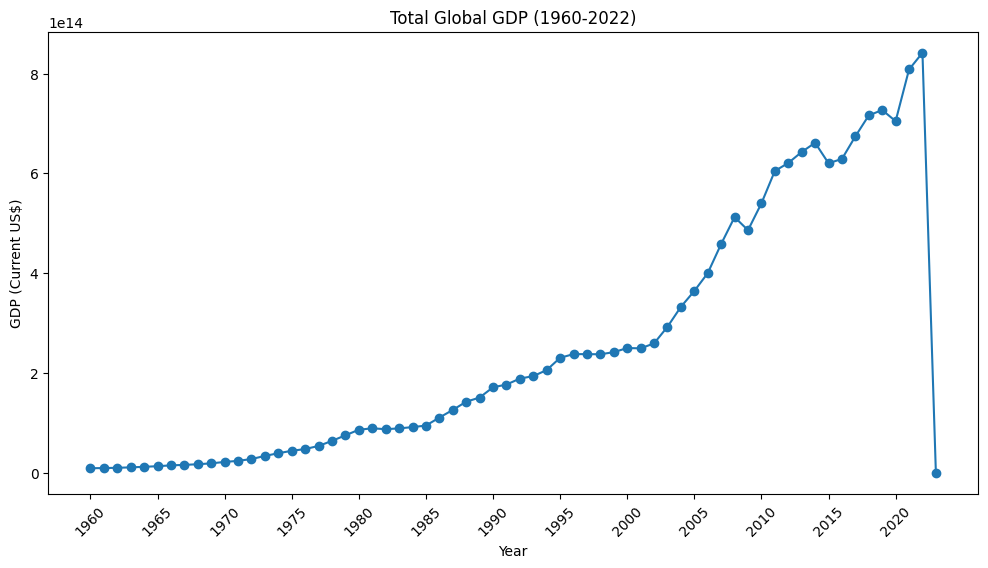

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'date' is numeric (extract year from date strings)
df['date'] = pd.to_datetime(df['date']).dt.year

# Aggregate GDP
gdp_over_time = df.groupby('date')['GDP_current_US'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(gdp_over_time['date'], gdp_over_time['GDP_current_US'], marker='o')
plt.title('Total Global GDP (1960-2022)')
plt.xlabel('Year')
plt.ylabel('GDP (Current US$)')

# Show only every 5th year
plt.xticks(gdp_over_time['date'][::5], rotation=45)

plt.show()

2) **Wealth vs. Health:** What is the relationship between GDP per capita and Life Expectancy?

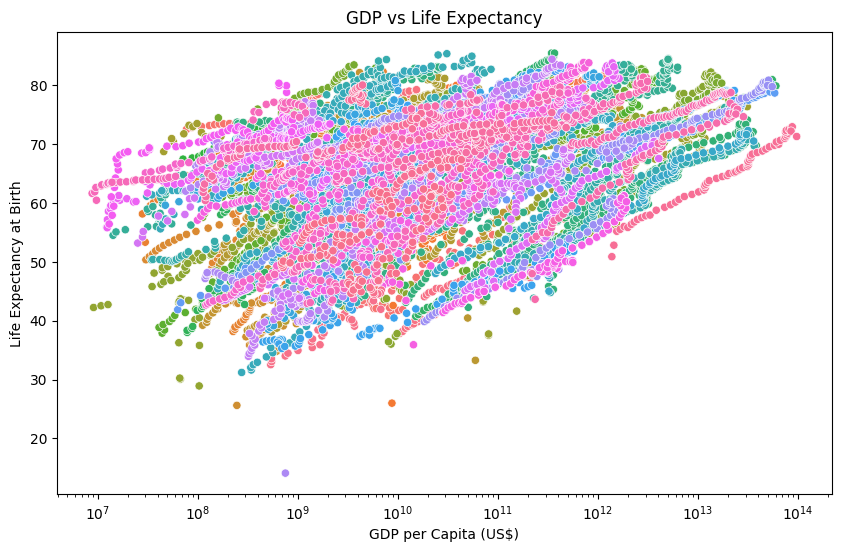

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='GDP_current_US', y='life_expectancy_at_birth', hue='country', legend=False)
plt.xscale('log')
plt.title('GDP vs Life Expectancy')
plt.xlabel('GDP per Capita (US$)')
plt.ylabel('Life Expectancy at Birth')
plt.show()


3) **Climate Impact:** Who are the top 10 CO2 emitters in the most recent year?

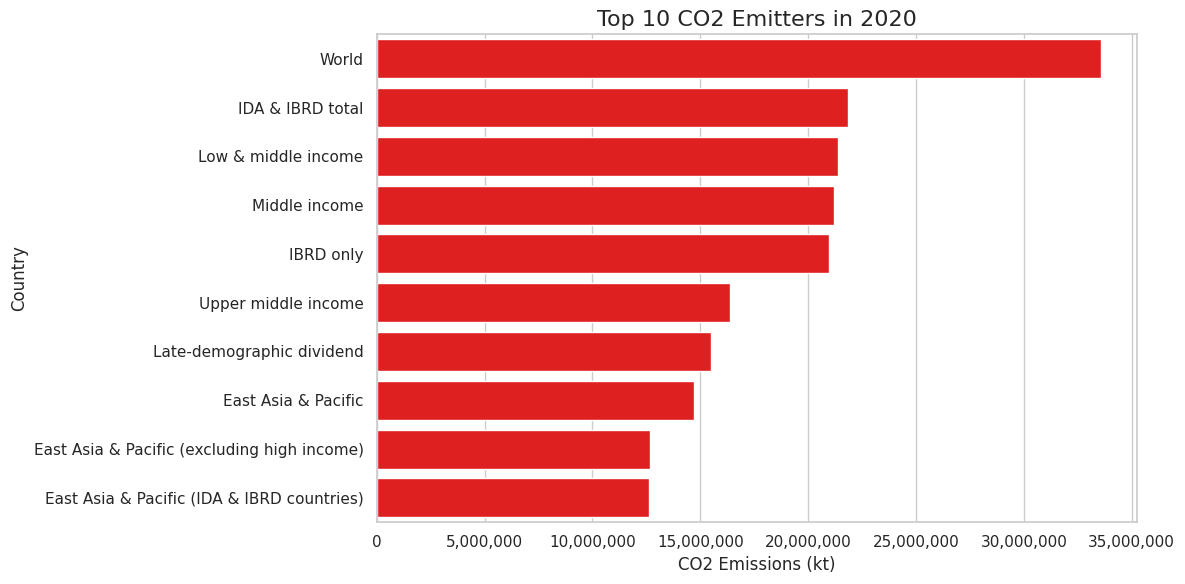

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter

plt.figure(figsize=(12, 6))

# Corrected: Use 'date' column instead of 'year'
latest_co2_year = df[df['CO2_emisions'].notna()]['date'].max()
top_emitters = df[df['date'] == latest_co2_year].nlargest(10, 'CO2_emisions')

ax = sns.barplot(data=top_emitters, y='country', x='CO2_emisions', color='red')

plt.title(f'Top 10 CO2 Emitters in {latest_co2_year}', fontsize=16)
plt.xlabel('CO2 Emissions (kt)', fontsize=12)
plt.ylabel('Country', fontsize=12)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

4) **Energy Transition:** How has renewable energy consumption evolved for major economies?

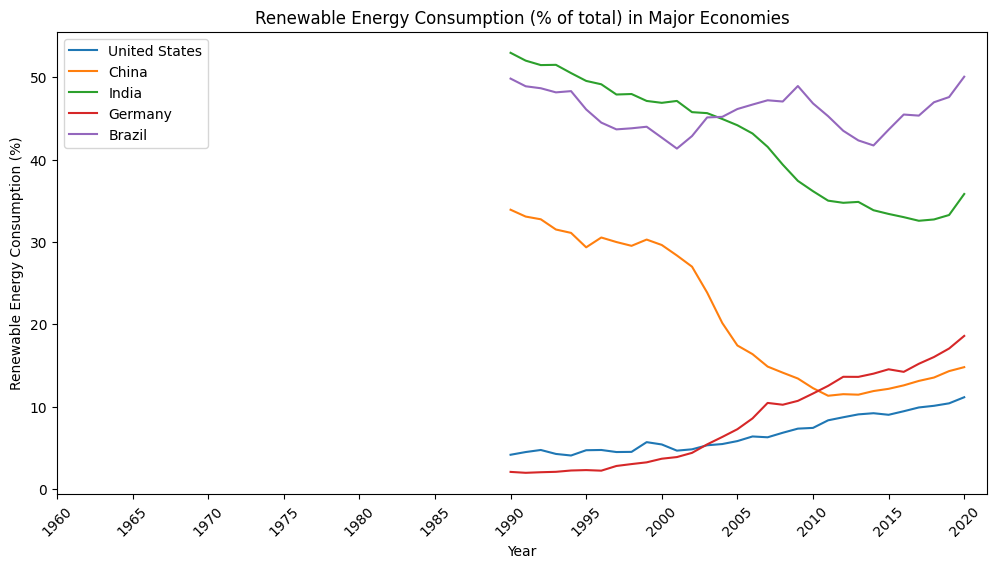

In [26]:
major_economies = ['United States', 'China', 'India', 'Germany', 'Brazil']

plt.figure(figsize=(12,6))
for country in major_economies:
    subset = df[df['country']==country]
    plt.plot(subset['date'], subset['renewvable_energy_consumption%'], label=country)

plt.title('Renewable Energy Consumption (% of total) in Major Economies')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Consumption (%)')
plt.xticks(subset['date'][::5], rotation=45)  # Every 5 years
plt.legend()
plt.show()


5) **Infrastructure Gap:** How does rurality correlate with access to electricity?

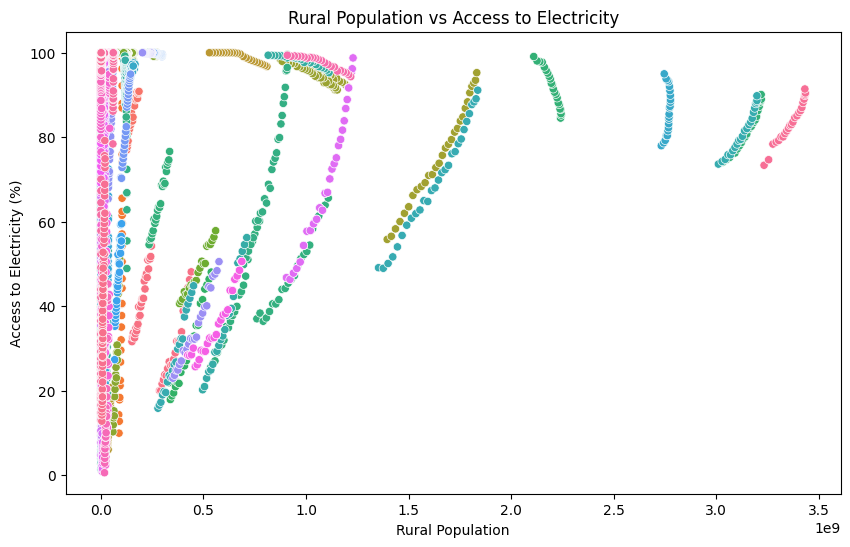

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='rural_population', y='access_to_electricity%', hue='country', legend=False)
plt.title('Rural Population vs Access to Electricity')
plt.xlabel('Rural Population')
plt.ylabel('Access to Electricity (%)')
plt.show()


6) **Education Investment:** Does higher education spending correlate with the Human Capital Index?

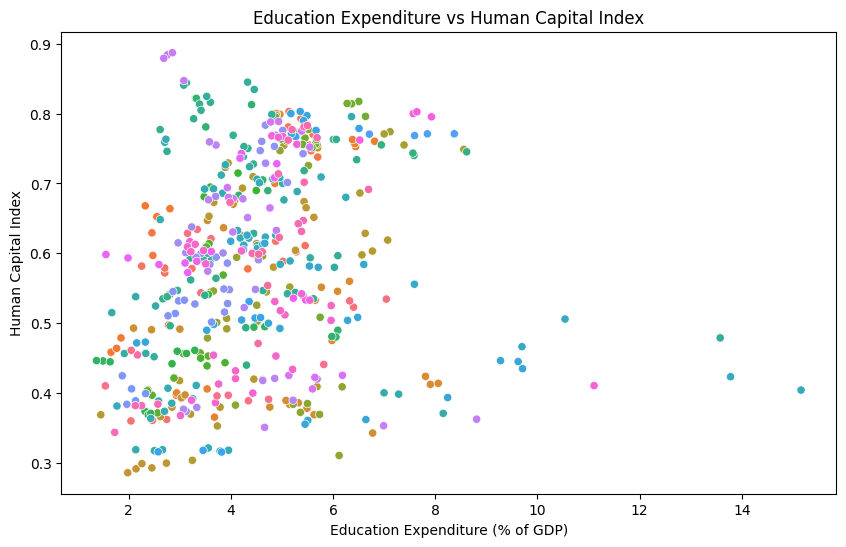

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='government_expenditure_on_education%', y='human_capital_index', hue='country', legend=False)
plt.title('Education Expenditure vs Human Capital Index')
plt.xlabel('Education Expenditure (% of GDP)')
plt.ylabel('Human Capital Index')
plt.show()


7) **Demographic Transition:** How have global average birth and death rates changed since 1960?

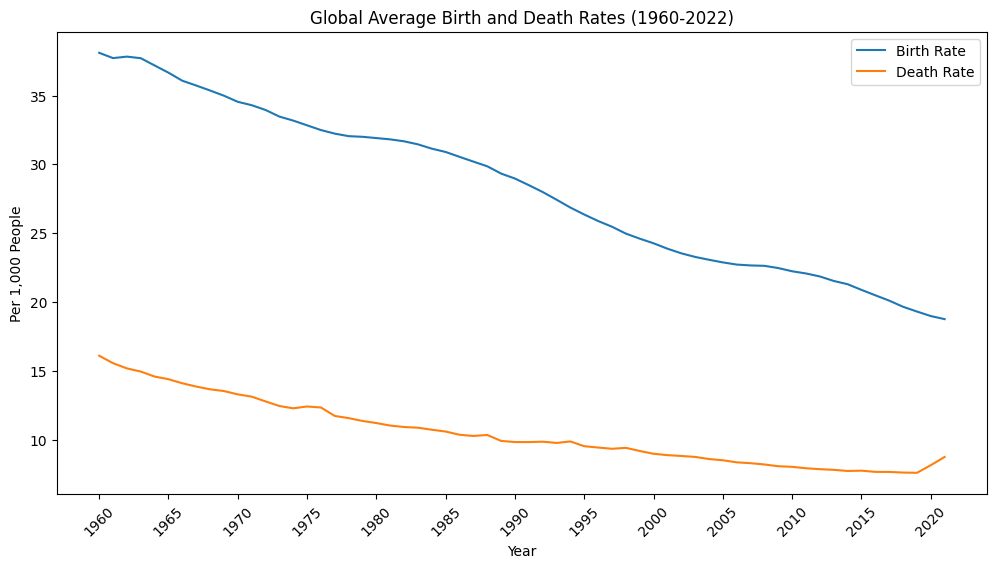

In [29]:
birth_death = df.groupby('date')[['birth_rate', 'death_rate']].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(birth_death['date'], birth_death['birth_rate'], label='Birth Rate')
plt.plot(birth_death['date'], birth_death['death_rate'], label='Death Rate')
plt.title('Global Average Birth and Death Rates (1960-2022)')
plt.xlabel('Year')
plt.ylabel('Per 1,000 People')
plt.xticks(birth_death['date'][::5], rotation=45)  # Every 5 years
plt.legend()
plt.show()


8) **The Digital Divide:** How does internet penetration differ by national income levels?

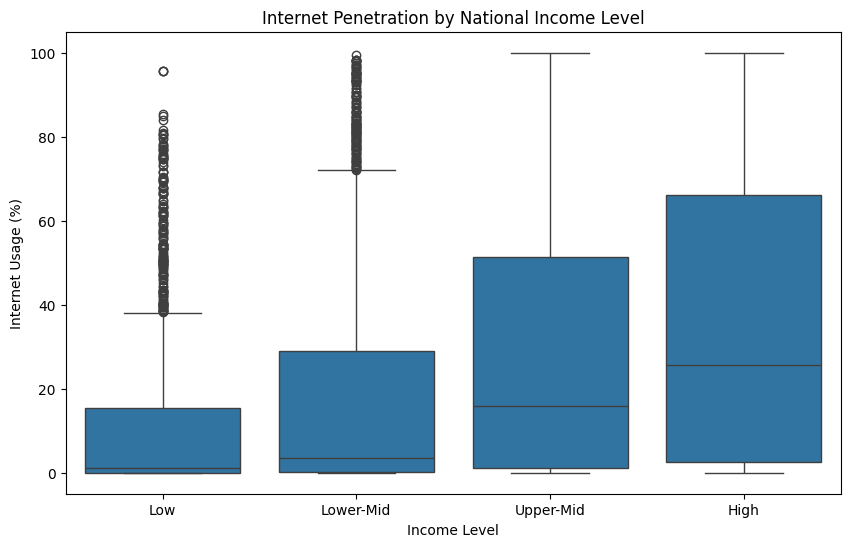

In [30]:
df['income_quartile'] = pd.qcut(df['GDP_current_US'], 4, labels=['Low', 'Lower-Mid', 'Upper-Mid', 'High'])

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='income_quartile', y='individuals_using_internet%')
plt.title('Internet Penetration by National Income Level')
plt.xlabel('Income Level')
plt.ylabel('Internet Usage (%)')
plt.show()


9) **Governance and Stability:** Is there a link between corruption control and political stability?

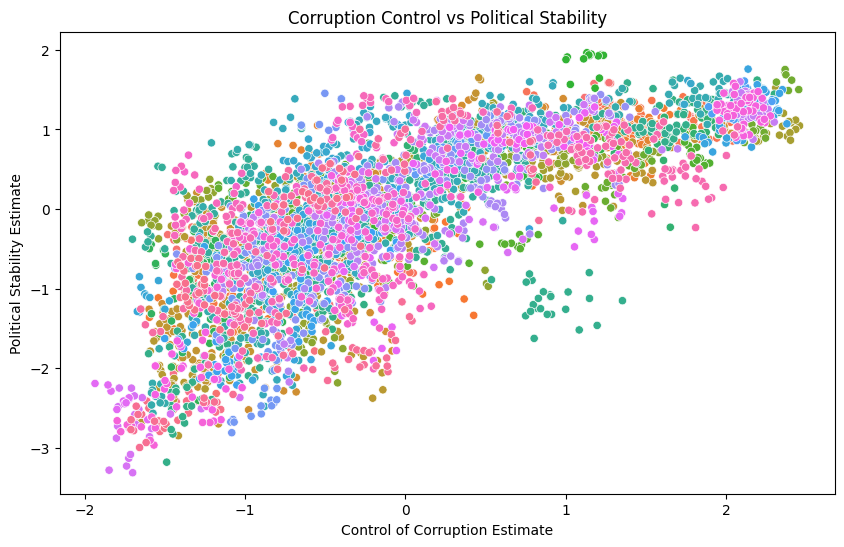

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='control_of_corruption_estimate', y='political_stability_estimate', hue='country', legend=False)
plt.title('Corruption Control vs Political Stability')
plt.xlabel('Control of Corruption Estimate')
plt.ylabel('Political Stability Estimate')
plt.show()


10) **Land Use Change:** How have global forest and agricultural land shares shifted over time?

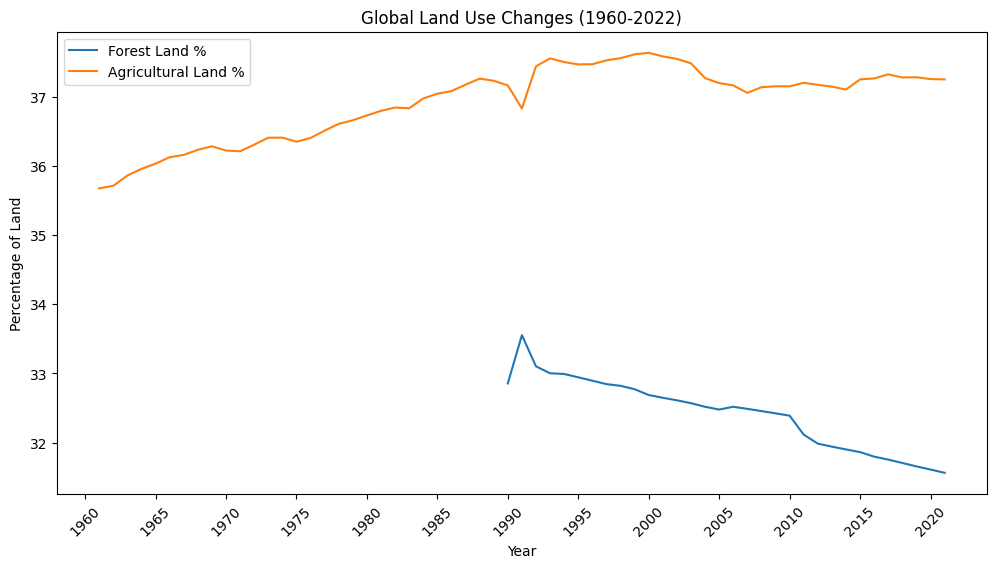

In [32]:
land_use = df.groupby('date')[['forest_land%', 'agricultural_land%']].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(land_use['date'], land_use['forest_land%'], label='Forest Land %')
plt.plot(land_use['date'], land_use['agricultural_land%'], label='Agricultural Land %')
plt.title('Global Land Use Changes (1960-2022)')
plt.xlabel('Year')
plt.ylabel('Percentage of Land')
plt.xticks(land_use['date'][::5], rotation=45)
plt.legend()
plt.show()


11) **Military Spending:** What is the long-term trend of global military expenditure as a % of GDP?

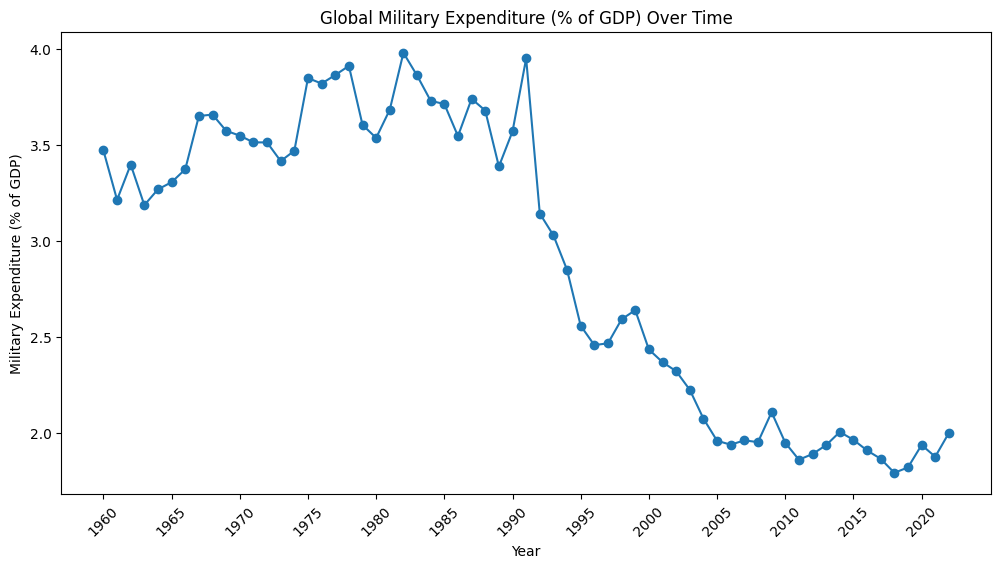

In [33]:
military = df.groupby('date')['military_expenditure%'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(military['date'], military['military_expenditure%'], marker='o')
plt.title('Global Military Expenditure (% of GDP) Over Time')
plt.xlabel('Year')
plt.ylabel('Military Expenditure (% of GDP)')
plt.xticks(military['date'][::5], rotation=45)
plt.show()


12) **Economic Volatility:** How has global average inflation fluctuated over the decades?

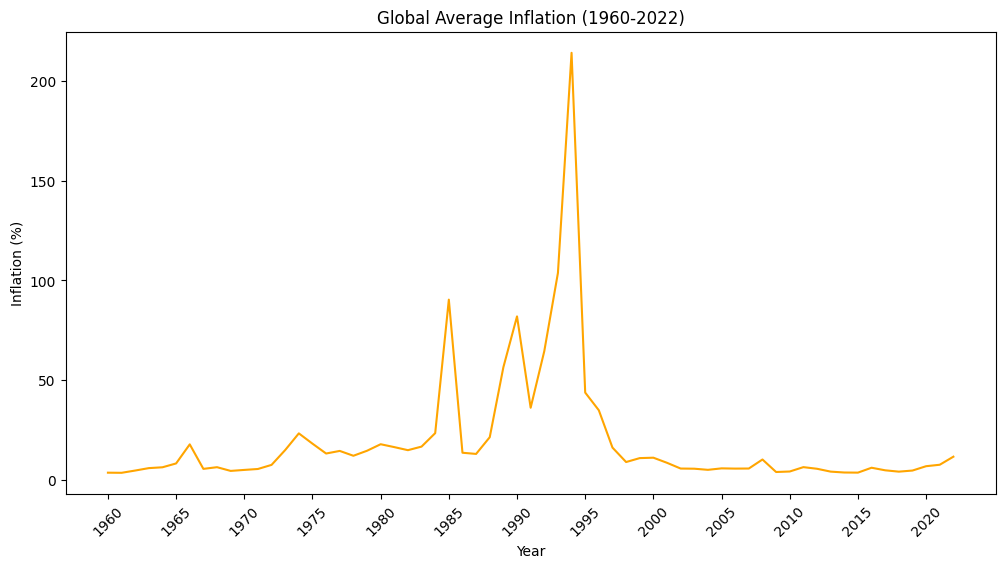

In [35]:
inflation = df.groupby('date')['inflation_annual%'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(inflation['date'], inflation['inflation_annual%'], color='orange')
plt.title('Global Average Inflation (1960-2022)')
plt.xlabel('Year')
plt.ylabel('Inflation (%)')
plt.xticks(inflation['date'][::5], rotation=45)
plt.show()


13) **Health Spending:** What is the relationship between government health expenditure and life expectancy?

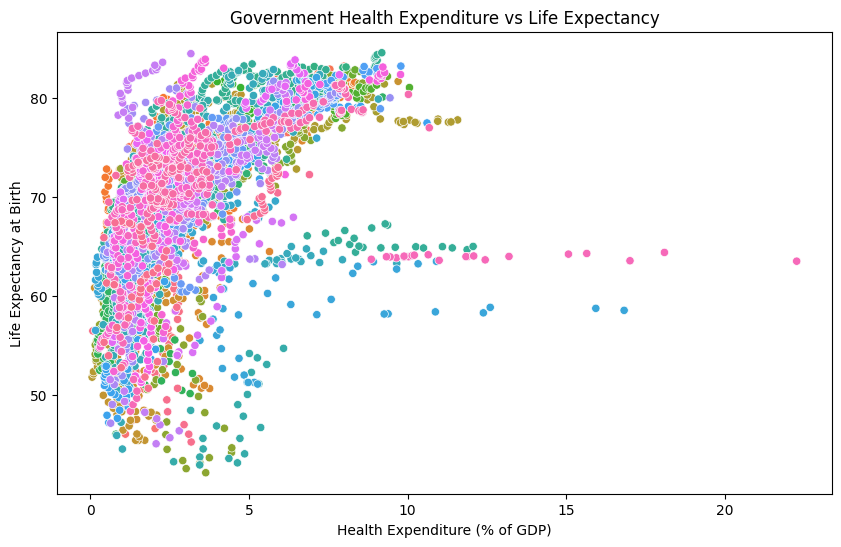

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='government_health_expenditure%', y='life_expectancy_at_birth', hue='country', legend=False)
plt.title('Government Health Expenditure vs Life Expectancy')
plt.xlabel('Health Expenditure (% of GDP)')
plt.ylabel('Life Expectancy at Birth')
plt.show()


14) **Safety and Wealth:** Is there a correlation between intentional homicide rates and GDP per capita?

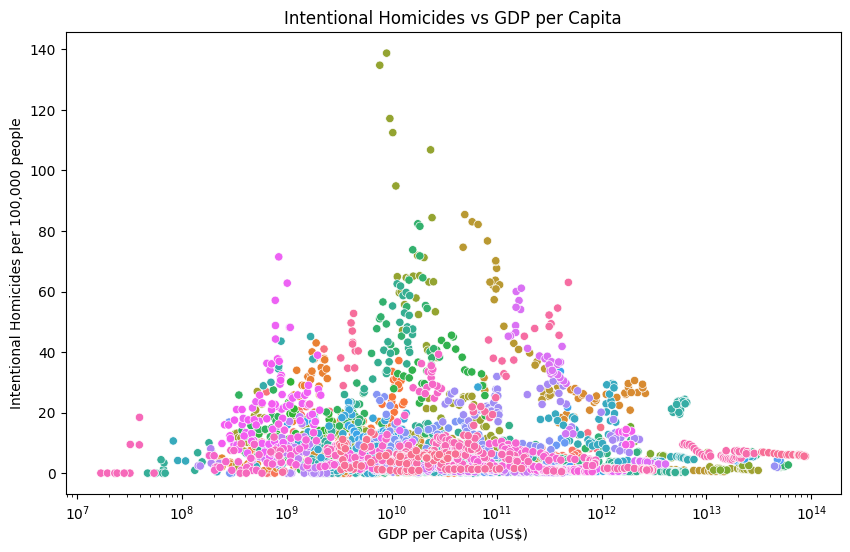

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='GDP_current_US', y='intentional_homicides', hue='country', legend=False)
plt.xscale('log')
plt.title('Intentional Homicides vs GDP per Capita')
plt.xlabel('GDP per Capita (US$)')
plt.ylabel('Intentional Homicides per 100,000 people')
plt.show()


15) **Research & Innovation:** How does investment in R&D relate to national economic output?

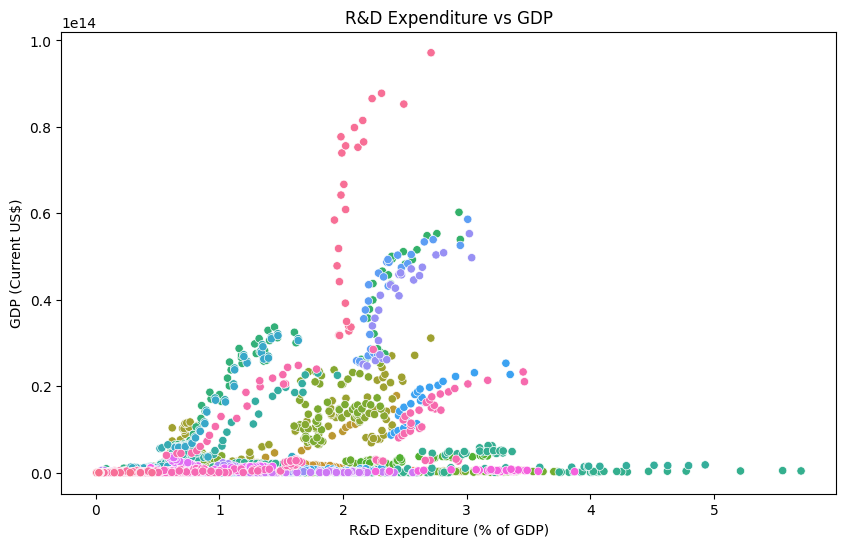

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='research_and_development_expenditure%', y='GDP_current_US', hue='country', legend=False)
plt.title('R&D Expenditure vs GDP')
plt.xlabel('R&D Expenditure (% of GDP)')
plt.ylabel('GDP (Current US$)')
plt.show()
